# Single Layer Perceptron with TensorFlow
Implement a Single Layer Perceptron (SLP) neural network to understand how to develop neural netweok with TensorFlow.

In [10]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [11]:
#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5
print(inputX)
print(inputY)

[[1.  3. ]
 [1.  2. ]
 [1.  1.5]
 [1.5 2. ]
 [2.  3. ]
 [2.5 1.5]
 [2.  1. ]
 [3.  1. ]
 [3.  2. ]
 [3.5 1. ]
 [3.5 3. ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


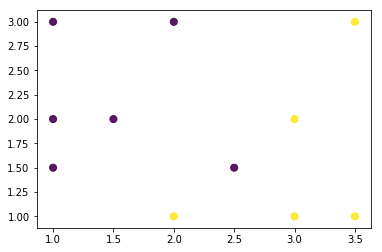

In [12]:
# labelling the data with colors
yc = [0]*6 + [1]*5
print(yc)
plt.scatter(inputX[:,0],inputX[:,1],c=yc, s=50, alpha=0.9)
plt.show()

In [13]:
# set up the stage by defining various parameters to be used during learning phase
learning_rate = 0.01
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

n_input = 2 # size data input (# size of each element of x)
n_classes = 2 # n of classes

In [15]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

In [16]:
# Set model weights
W = tf.Variable(tf.zeros([n_input, n_classes])) 
b = tf.Variable(tf.zeros([n_classes]))

In [17]:
evidence = tf.add(tf.matmul(x, W), b)

In [18]:
y_ = tf.nn.softmax(evidence)

In [19]:
cost = tf.reduce_sum(tf.pow(y-y_,2))/ (2 * n_samples)

In [20]:
optimizer =tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [21]:
avg_set = []
epoch_set=[]

In [22]:
init = tf.global_variables_initializer()

In [23]:
with tf.Session() as sess:
    sess.run(init)
        
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y: inputY})
        if i % display_step == 0:
            c = sess.run(cost, feed_dict = {x: inputX, y: inputY})
            print("Epoch:", '%04d' % (i), "cost=", "{:.9f}".format(c))
            avg_set.append(c)
            epoch_set.append(i + 1)
    
    print("Training phase finished")
     
    training_cost = sess.run(cost, feed_dict = {x: inputX, y: inputY})
    print("Training cost = ", training_cost, "\nW=", sess.run(W), "\nb=", sess.run(b))
    last_result = sess.run(y_, feed_dict = {x:inputX})
    print("Last result = ",last_result)

Epoch: 0000 cost= 0.249360293
Epoch: 0050 cost= 0.221041098
Epoch: 0100 cost= 0.198898271
Epoch: 0150 cost= 0.181669712
Epoch: 0200 cost= 0.168204844
Epoch: 0250 cost= 0.157555193
Epoch: 0300 cost= 0.149002746
Epoch: 0350 cost= 0.142023861
Epoch: 0400 cost= 0.136240512
Epoch: 0450 cost= 0.131379008
Epoch: 0500 cost= 0.127239138
Epoch: 0550 cost= 0.123672642
Epoch: 0600 cost= 0.120568052
Epoch: 0650 cost= 0.117840447
Epoch: 0700 cost= 0.115424201
Epoch: 0750 cost= 0.113267884
Epoch: 0800 cost= 0.111330733
Epoch: 0850 cost= 0.109580077
Epoch: 0900 cost= 0.107989423
Epoch: 0950 cost= 0.106537104
Epoch: 1000 cost= 0.105205171
Epoch: 1050 cost= 0.103978693
Epoch: 1100 cost= 0.102845177
Epoch: 1150 cost= 0.101793967
Epoch: 1200 cost= 0.100816056
Epoch: 1250 cost= 0.099903718
Epoch: 1300 cost= 0.099050261
Epoch: 1350 cost= 0.098249912
Epoch: 1400 cost= 0.097497642
Epoch: 1450 cost= 0.096789040
Epoch: 1500 cost= 0.096120216
Epoch: 1550 cost= 0.095487759
Epoch: 1600 cost= 0.094888613
Epoch: 165

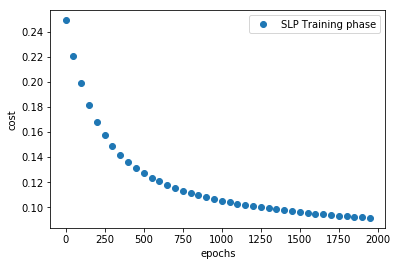

In [24]:
plt.plot(epoch_set,avg_set,'o',label = 'SLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

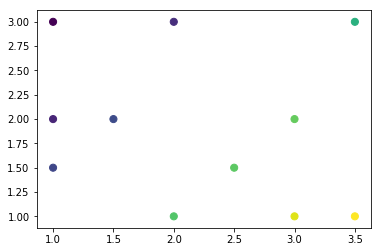

In [25]:
yc = last_result[:,1]
plt.scatter(inputX[:,0],inputX[:,1],c=yc, s=50, alpha=1)
plt.show()

In [26]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6
print(testX)
print(testY)

[[1.   2.25]
 [1.25 3.  ]
 [2.   2.5 ]
 [2.25 2.75]
 [2.5  3.  ]
 [2.   0.9 ]
 [2.5  1.2 ]
 [3.   1.25]
 [3.   1.5 ]
 [3.5  2.  ]
 [3.5  2.5 ]]
[[1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]


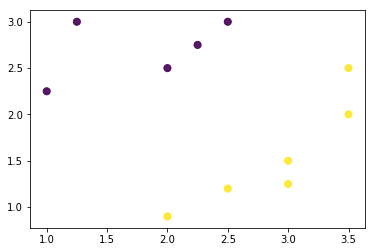

In [27]:
yc = [0]*5 + [1]*6
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=0.9)
plt.show()

In [28]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
        
    for i in range(training_epochs):
        sess.run(optimizer, feed_dict = {x: inputX, y: inputY})
    
    pred = tf.nn.softmax(evidence) 
    result = sess.run(pred, feed_dict = {x: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(testY, 1))
     
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: testX, y: testY}))

Accuracy: 1.0


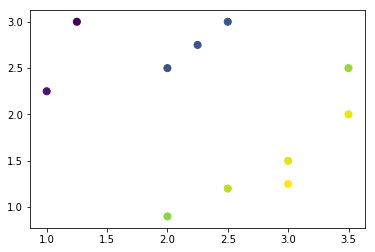

In [29]:
yc = result[:,1]
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()

# Multi Layer Perceptron (with 1 Hidden Layer) with TensorFlow

Execute same problem with one hidden layer

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

In [31]:
# Network Parameters
n_hidden_1 = 2 # 1st layer number of neurons
#n_hidden_2 = 0 # 2nd layer number of neurons
n_input = 2 # size data input
n_classes = 2 # classes

In [32]:
# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

In [33]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    #'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_1, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    #'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [34]:
# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    #layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_1, weights['out']) + biases['out']
    return out_layer

In [35]:
# Construct model
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

In [36]:
# Define cost and optimizer
cost = tf.reduce_sum(tf.pow(Y-y_,2))/ (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [37]:
avg_set = []
epoch_set = []
init = tf.global_variables_initializer()

In [38]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        # Loop over all batches
        for i in range(total_batch):
            #batch_x, batch_y = inputdata.next_batch(batch_size) TO BE IMPLEMENTED
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
            avg_set.append(avg_cost)
            epoch_set.append(epoch + 1)
     
    print("Training phase finished")
    last_result = sess.run(y_, feed_dict = {X: inputX})
    training_cost = sess.run(cost, feed_dict = {X: inputX, Y: inputY})
    print("Training cost = ", training_cost)  
    print("Last result = ", last_result)

Epoch: 0001 cost=0.220194995
Epoch: 0051 cost=0.140848249
Epoch: 0101 cost=0.119864553
Epoch: 0151 cost=0.115684435
Epoch: 0201 cost=0.112412013
Epoch: 0251 cost=0.109308094
Epoch: 0301 cost=0.106412910
Epoch: 0351 cost=0.103737257
Epoch: 0401 cost=0.101276420
Epoch: 0451 cost=0.099019334
Epoch: 0501 cost=0.096952356
Epoch: 0551 cost=0.095060982
Epoch: 0601 cost=0.093330517
Epoch: 0651 cost=0.091746442
Epoch: 0701 cost=0.090294637
Epoch: 0751 cost=0.088961519
Epoch: 0801 cost=0.087734289
Epoch: 0851 cost=0.086601101
Epoch: 0901 cost=0.085551113
Epoch: 0951 cost=0.084574603
Epoch: 1001 cost=0.083663009
Epoch: 1051 cost=0.082808942
Epoch: 1101 cost=0.082006097
Epoch: 1151 cost=0.081249170
Epoch: 1201 cost=0.080533884
Epoch: 1251 cost=0.079856634
Epoch: 1301 cost=0.079214647
Epoch: 1351 cost=0.078605704
Epoch: 1401 cost=0.078027964
Epoch: 1451 cost=0.077480026
Epoch: 1501 cost=0.076960698
Epoch: 1551 cost=0.076468982
Epoch: 1601 cost=0.076003976
Epoch: 1651 cost=0.075564899
Epoch: 1701 co

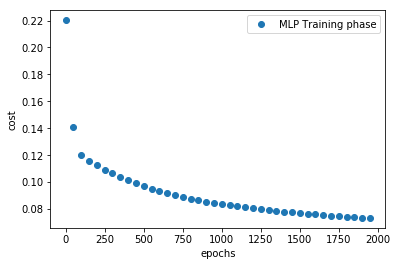

In [39]:
plt.plot(epoch_set,avg_set,'o',label = 'MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [40]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [41]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
   
    # Test model
    pred = tf.nn.softmax(evidence) # Apply softmax to logits
    result = sess.run(pred, feed_dict = {X: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: testX, Y: testY}))

print("Result = ", result)

Accuracy: 1.0
Result =  [[0.9786639  0.02133612]
 [0.98685896 0.01314099]
 [0.84697574 0.15302426]
 [0.81169146 0.18830857]
 [0.770476   0.22952399]
 [0.33924612 0.6607539 ]
 [0.18786438 0.81213564]
 [0.06705966 0.93294036]
 [0.09438451 0.9056155 ]
 [0.05945092 0.94054914]
 [0.11729778 0.88270223]]


[0.02133612 0.01314099 0.15302426 0.18830857 0.22952399 0.6607539
 0.81213564 0.93294036 0.9056155  0.94054914 0.88270223]


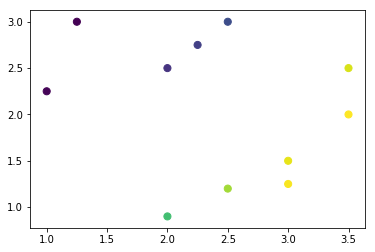

In [42]:
yc = result[:,1]
print(yc)
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()

# Multi Layer Perceptron (with Two Hidden Layer) with TensorFlow

Extend the previous example by adding two neurons to the first hidden layer and adding a second hidden layer with two neurons.


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

#Training set
inputX = np.array([[1.,3.],[1.,2.],[1.,1.5],[1.5,2.],[2.,3.],[2.5,1.5],[2.,1.],[3.,1.],[3.,2.],[3.5,1.],[3.5,3.]])
inputY = [[1.,0.]]*6+ [[0.,1.]]*5

learning_rate = 0.001
training_epochs = 2000
display_step = 50
n_samples = 11
batch_size = 11
total_batch = int(n_samples/batch_size)

# Network Parameters
n_hidden_1 = 4 # 1st layer number of neurons
n_hidden_2 = 2 # 2nd layer number of neurons
n_input = 2 # size data input
n_classes = 2 # classes

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Create model
def multilayer_perceptron(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    #out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

# Construct model
evidence = multilayer_perceptron(X)
y_ = tf.nn.softmax(evidence)

# Define cost and optimizer
cost = tf.reduce_sum(tf.pow(Y-y_,2))/ (2 * n_samples)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

avg_set = []
epoch_set = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.
        # Loop over all batches
        for i in range(total_batch):
            #batch_x, batch_y = inputdata.next_batch(batch_size) TO BE IMPLEMENTED
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
            avg_set.append(avg_cost)
            epoch_set.append(epoch + 1)
     
    print("Training phase finished")
    last_result = sess.run(y_, feed_dict = {X: inputX})
    training_cost = sess.run(cost, feed_dict = {X: inputX, Y: inputY})
    print("Training cost = ", training_cost)  
    print("Last result = ", last_result)

Epoch: 0001 cost=0.228397101
Epoch: 0051 cost=0.125258282
Epoch: 0101 cost=0.087021053
Epoch: 0151 cost=0.078583948
Epoch: 0201 cost=0.076135911
Epoch: 0251 cost=0.074886359
Epoch: 0301 cost=0.074140437
Epoch: 0351 cost=0.073641069
Epoch: 0401 cost=0.073268957
Epoch: 0451 cost=0.072965622
Epoch: 0501 cost=0.072701484
Epoch: 0551 cost=0.072461672
Epoch: 0601 cost=0.072238825
Epoch: 0651 cost=0.072029740
Epoch: 0701 cost=0.071833313
Epoch: 0751 cost=0.071649432
Epoch: 0801 cost=0.071478546
Epoch: 0851 cost=0.071321160
Epoch: 0901 cost=0.071177781
Epoch: 0951 cost=0.071048655
Epoch: 1001 cost=0.070933834
Epoch: 1051 cost=0.070833087
Epoch: 1101 cost=0.070745870
Epoch: 1151 cost=0.070671476
Epoch: 1201 cost=0.070609026
Epoch: 1251 cost=0.070557311
Epoch: 1301 cost=0.070515230
Epoch: 1351 cost=0.070481524
Epoch: 1401 cost=0.070454963
Epoch: 1451 cost=0.070434347
Epoch: 1501 cost=0.070418634
Epoch: 1551 cost=0.070406847
Epoch: 1601 cost=0.070398152
Epoch: 1651 cost=0.070391871
Epoch: 1701 co

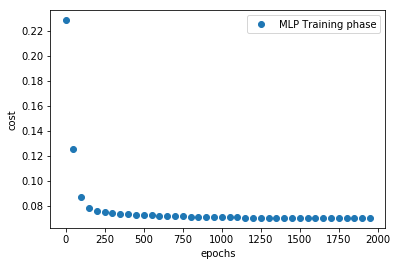

In [44]:
plt.plot(epoch_set,avg_set,'o',label = 'MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [45]:
#Testing set
testX = np.array([[1.,2.25],[1.25,3.],[2,2.5],[2.25,2.75],[2.5,3.],[2.,0.9],[2.5,1.2],[3.,1.25],[3.,1.5],[3.5,2.],[3.5,2.5]])
testY = [[1.,0.]]*5 + [[0.,1.]]*6

In [46]:
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})

   
    # Test model
    pred = tf.nn.softmax(evidence) # Apply softmax to logits
    result = sess.run(pred, feed_dict = {X: testX})
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: testX, Y: testY}))

print("Result = ", result)

Accuracy: 1.0
Result =  [[0.98924166 0.01075834]
 [0.99345267 0.00654732]
 [0.88659537 0.1134046 ]
 [0.85130554 0.14869446]
 [0.8074194  0.19258058]
 [0.36741427 0.6325857 ]
 [0.18371269 0.81628734]
 [0.0549055  0.9450945 ]
 [0.08021274 0.9197873 ]
 [0.04467836 0.95532167]
 [0.09533782 0.90466213]]


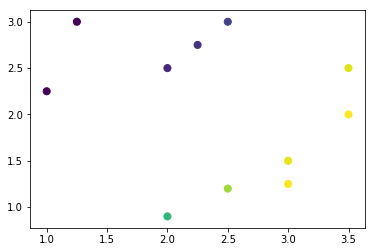

In [47]:
yc = result[:,1]
plt.scatter(testX[:,0],testX[:,1],c=yc, s=50, alpha=1)
plt.show()

# Another Test

In [48]:
test = 3*np.random.random((1000,2))
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(training_epochs):
        for i in range(total_batch):
            batch_x = inputX
            batch_y = inputY
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_x, Y: batch_y})

   
    # Test model
    pred = tf.nn.softmax(evidence) 
    result = sess.run(pred, feed_dict = {X: test})

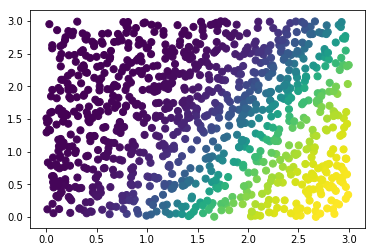

In [49]:
yc = result[:,1]
plt.scatter(test[:,0],test[:,1],c=yc, s=50, alpha=1)
plt.show()

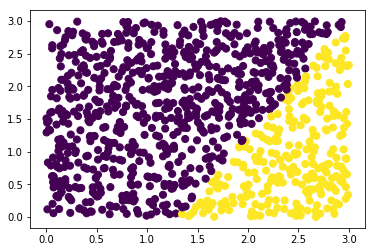

In [50]:
yc = np.round(result[:,1])
plt.scatter(test[:,0],test[:,1],c=yc, s=50, alpha=1)
plt.show()